In [1]:
from sklearn import metrics
from skimage import io
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import pandas as pd
import glob
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Medidas Imagen 

In [7]:
def leerc(file):
  filcs = pd.read_csv(file)
  print('Archivo Cargado ',file)
  print(filcs.head())
  y_ref = np.array(filcs['Classified'])
  #print(y_ref)
  print(len(y_ref))
  y_pred = np.array(filcs['Thematic_C'])
  #print(y_pred)
  print(len(y_pred))
  return y_ref, y_pred

Matriz Confusion

In [8]:
def mconfk(y_ref, y_pred,i):
  from sklearn.metrics import confusion_matrix
  m_conf = confusion_matrix(y_ref, y_pred,labels=[0,1])
  print(m_conf)
  total = np.sum(m_conf)
  N = total
  p0 = np.sum(np.diag(m_conf)) / N
  pc = np.sum(np.sum(m_conf, axis=0) * np.sum(m_conf, axis=1)) / N ** 2
  kappa = (p0 - pc) / (1 - pc)
  print('Kappa: ', round(kappa,3))
  data = {'y_Actual':    y_ref,
          'y_Predicted': y_pred
          }

  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
  plt.figure(figsize=(6,5))
  fig, ax = plt.subplots(figsize=(6, 5))
  index = ['No Cambios','Cambios']  
  columns = ['No Cambios','Cambios',]  

  sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax, cmap='rocket_r');  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Matriz Confusión - '+str(fechas[i+1]) + "_" + str(fechas[i])); 
  ax.xaxis.set_ticklabels(index); ax.yaxis.set_ticklabels(columns);

  fig.show()
  fig.tight_layout()
  ruta = "/content/gdrive/MyDrive/Mineria_Planet/modelos/Validacion/Graficas_Cambios_m2/"
  fig.savefig(ruta+'/Mconfusion_'+str(fechas[i+1]) + "_" + str(fechas[i])+'_M2.png', dpi=300)

  #Exactitud Productor
  tot_c0 = sum(m_conf[:,0])
  tot_c1 = sum(m_conf[:,1])
  val_c0 = m_conf[0,0]
  val_c1 = m_conf[1,1]
  exac_pr = [val_c0/tot_c0, val_c1/tot_c1]
  print('Exactitud Productor: ', exac_pr)

  #Exactitud Usuario
  tot_c0 = sum(m_conf[0,:])
  tot_c1 = sum(m_conf[1,:])
  val_c0 = m_conf[0,0]
  val_c1 = m_conf[1,1]
  exac_us = [val_c0/tot_c0, val_c1/tot_c1]
  print('Exactitud Usuario: ',exac_us)

  return kappa, confusion_matrix, exac_pr, exac_us


Otras Medidas

In [9]:
def otmedidas(y_ref, y_pred):
  # Accuracy
  accu_s = accuracy_score(y_ref, y_pred)
  print('Exactitud General: ',accu_s)

  # Recall
  rcall_s = recall_score(y_ref, y_pred, average=None)
  print('Sensibilidad: ',rcall_s)

  # Precision
  pr_s = precision_score(y_ref, y_pred, average=None)
  print('Precision: ',pr_s)

  # F1 Score
  f1_s = f1_score(y_ref, y_pred, average=None)
  print('F1_Score: ', f1_s)

  return accu_s, rcall_s, pr_s, f1_s

Archivo Cargado  /content/gdrive/MyDrive/Mineria_Planet/modelos/Validacion/Muestreo_Cambios_m2/MuestreoCmb_m2_201712_201710.csv
   FID  ID Class_Name  Classified  Thematic_C Match
0    0   1  NoCambios           0           0   Yes
1    1   2  NoCambios           0           0   Yes
2    2   3  NoCambios           0           0   Yes
3    3   4  NoCambios           0           0   Yes
4    4   5  NoCambios           0           0   Yes
1000
1000
[[717  18]
 [  8 257]]
Kappa:  0.934
Exactitud Productor:  [0.9889655172413793, 0.9345454545454546]
Exactitud Usuario:  [0.9755102040816327, 0.969811320754717]
Exactitud General:  0.974
Sensibilidad:  [0.9755102  0.96981132]
Precision:  [0.98896552 0.93454545]
F1_Score:  [0.98219178 0.95185185]
Archivo Cargado  /content/gdrive/MyDrive/Mineria_Planet/modelos/Validacion/Muestreo_Cambios_m2/MuestreoCmb_m2_201803_201712.csv
   FID  ID Class_Name  Classified  Thematic_C Match
0    0   1  NoCambios           0           0   Yes
1    1   2  NoCambios 

<Figure size 432x360 with 0 Axes>

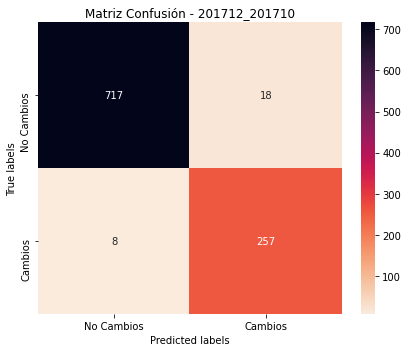

<Figure size 432x360 with 0 Axes>

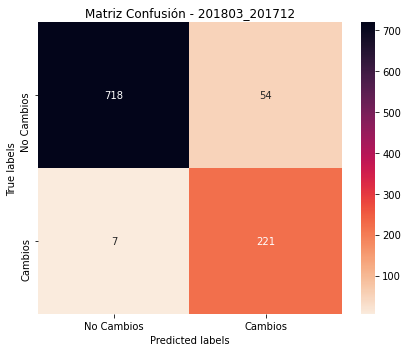

<Figure size 432x360 with 0 Axes>

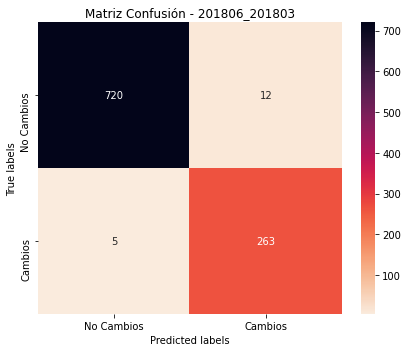

<Figure size 432x360 with 0 Axes>

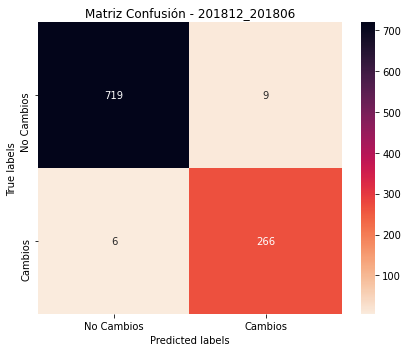

<Figure size 432x360 with 0 Axes>

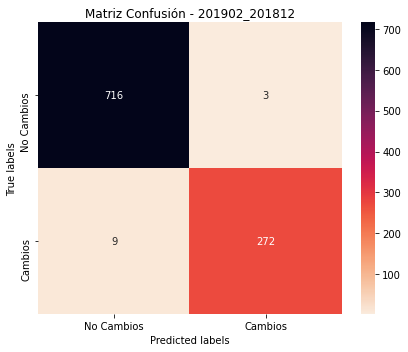

<Figure size 432x360 with 0 Axes>

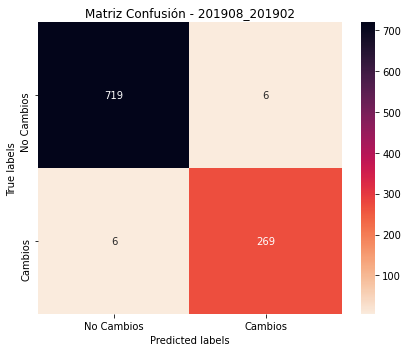

<Figure size 432x360 with 0 Axes>

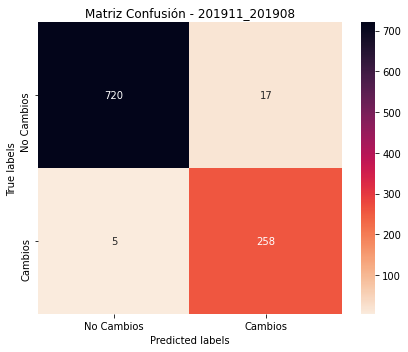

In [10]:
fechas = [201710,201712,201803,201806,201812,201902,201908,201911]
rutam = f"/content/gdrive/MyDrive/Mineria_Planet/modelos/Validacion/Muestreo_Cambios_m2/"
for i in range(0,len(fechas)-1):
  muestreoi = rutam + "MuestreoCmb_m2_" + str(fechas[i+1]) + "_" + str(fechas[i]) +".csv" 
  y_ref, y_pred = leerc(muestreoi)
  kappa, confusion_matrix, exac_pr, exac_us = mconfk(y_ref, y_pred, i)
  accu_s, rcall_s, pr_s, f1_s = otmedidas(y_ref, y_pred)
  f = open("/content/gdrive/MyDrive/Mineria_Planet/modelos/Validacion/Muestreo_Cambios_m2/Resultados.txt", "a")
  f.write('-------MEDIDAS CAMBIO: '+ str(fechas[i+1]) + "_" + str(fechas[i]) + '------- \n')
  f.write('Matriz de confusion \n')
  f.write(str(confusion_matrix)+'\n')
  f.write('Kappa: '+ str(round(kappa,3))+'\n')
  f.write('Exactitud Productor: '+ str(np.around(np.array(exac_pr), 3))+'\n')
  f.write('Exactitud Usuario: '+ str(np.around(np.array(exac_us), 3))+'\n')
  f.write('Exactitud General: '+ str(round(accu_s,3)) +'\n')
  f.write('Recall: '+ str(np.around(np.array(rcall_s), 3)) +'\n')
  f.write('Precision: '+ str(np.around(np.array(pr_s), 3)) +'\n')
  f.write('F1-Score: '+ str(np.around(np.array(f1_s), 3)) +'\n')
  f.write('\n \n')

f.close()